<a href="https://colab.research.google.com/github/FreeeSoul/DataScience/blob/main/20230221_FastCampus_MultiOutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [43]:
import pandas as pd

file = '/gdrive/MyDrive/data/data_2020_1_12.csv' # 내가 데이터 가공을 해서 csv로 정리까지 한 파일을 경로에서 가져온다
data = pd.read_csv(file)
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,105,637,2
1,20200101,4,101,105,773,2
2,20200101,4,101,105,762,2
3,20200101,4,101,105,746,2
4,20200101,4,101,105,875,2


 #1. 다입력/다출력 진행하려 한다.
 입력은 집계시, 요일이고 출력은 부산(407km), 대전(135km)까지의 거리이다.

In [44]:
data['도착영업소코드'] = data['도착영업소코드'].map({105 : 20, 110 : 77, 115 : 135, 120 : 185, 125 : 240, 130 : 215, 135 : 339, 140 : 407})

In [45]:
data.head()

,집계일자,집계시,출발영업소코드,도착영업소코드,통행시간,요일
0,20200101,4,101,20,637,2
1,20200101,4,101,20,773,2
2,20200101,4,101,20,762,2
3,20200101,4,101,20,746,2
4,20200101,4,101,20,875,2


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152870 entries, 0 to 152869
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   집계일자     152870 non-null  int64
 1   집계시      152870 non-null  int64
 2   출발영업소코드  152870 non-null  int64
 3   도착영업소코드  152870 non-null  int64
 4   통행시간     152870 non-null  int64
 5   요일       152870 non-null  int64
dtypes: int64(6)
memory usage: 7.0 MB


In [47]:
data.rename(columns={'도착영업소코드' : '거리'}, inplace=True)

In [48]:
data_destination = data[data['거리'].isin([135, 407])]

In [49]:
data_destination.head(40)

,집계일자,집계시,출발영업소코드,거리,통행시간,요일
174,20200101,10,101,135,5499,2
175,20200101,10,101,135,5329,2
176,20200101,20,101,135,5673,2
177,20200101,20,101,135,4662,2
178,20200101,4,101,135,5946,2
179,20200101,5,101,135,6466,2
180,20200101,23,101,135,5422,2
181,20200101,23,101,135,5363,2
182,20200101,23,101,135,6028,2
183,20200101,0,101,135,5718,2


In [50]:
data_destination = data_destination.groupby(['집계시', '요일', '거리'])['통행시간'].mean()

In [51]:
data_destination.head()

집계시  요일  거리 
0    0   135     5072.637037
         407    15549.675676
     1   135     5051.017391
         407    15983.102564
     2   135     5450.725000
Name: 통행시간, dtype: float64

In [52]:
data_destination = data_destination.unstack(level=-1) # 자료의 그래프 형태를 변화 시키고 싶을 때 사용하는 스킬 1) data.unstack(level=-1) -1 저 숫자는 나중에 필요할 때 인터넷 찾아서 변형하기
data_destination

거리              135           407
집계시 요일                           
0   0   5072.637037  15549.675676
    1   5051.017391  15983.102564
    2   5450.725000  15129.750000
    3   5263.705882  14533.189189
    4   5219.400000  15908.275000
...             ...           ...
23  2   5404.398601  16006.125000
    3   5627.057554  16118.288889
    4   6017.818182  17035.450980
    5   5431.022556  16033.622222
    6   5254.222973  15297.022727

[168 rows x 2 columns]

In [53]:
# 자료의 그래프 형태를 변화 시키고 싶을 때 사용하는 스킬 2) 주어진 자료 표를 더욱 리스트에 가깝게 바꿔주는 함수 -> data.reset_index()
data_list = data_destination.reset_index()
data_list

거리,집계시,요일,135,407
0,0,0,5072.637037,15549.675676
1,0,1,5051.017391,15983.102564
2,0,2,5450.725000,15129.750000
3,0,3,5263.705882,14533.189189
4,0,4,5219.400000,15908.275000
...,...,...,...,...
163,23,2,5404.398601,16006.125000
164,23,3,5627.057554,16118.288889
165,23,4,6017.818182,17035.450980
166,23,5,5431.022556,16033.622222


In [55]:
# 자료의 그래프 형태를 변화 시키고 싶을 때 사용하는 스킬 3) 주어진 자료 표를 정말로 리스트 형태로 바꿔주는 함수 -> data.values.tolist()
data_out = data_list.values.tolist()
data_out # 집계시(x1), 요일(x1), 거리에 따른 통행시간 135(y1), 407(y2)

[[0.0, 0.0, 5072.637037037037, 15549.675675675675],
 [0.0, 1.0, 5051.017391304348, 15983.102564102564],
 [0.0, 2.0, 5450.725, 15129.75],
 [0.0, 3.0, 5263.705882352941, 14533.18918918919],
 [0.0, 4.0, 5219.4, 15908.275],
 [0.0, 5.0, 5208.133802816901, 15321.372549019608],
 [0.0, 6.0, 4901.625, 14232.461538461539],
 [1.0, 0.0, 4942.333333333333, 15200.729166666666],
 [1.0, 1.0, 5088.949275362319, 15656.083333333334],
 [1.0, 2.0, 5324.818181818182, 15088.617021276596],
 [1.0, 3.0, 5245.3884892086335, 15112.045454545454],
 [1.0, 4.0, 5226.68992248062, 15188.155555555555],
 [1.0, 5.0, 5199.833333333333, 15066.396551724138],
 [1.0, 6.0, 4997.459016393443, 14635.577777777778],
 [2.0, 0.0, 5081.890756302521, 15057.040816326531],
 [2.0, 1.0, 5142.070921985815, 15581.347826086956],
 [2.0, 2.0, 5426.88275862069, 15345.9375],
 [2.0, 3.0, 5287.125, 15154.69642857143],
 [2.0, 4.0, 5360.228571428572, 15332.020408163266],
 [2.0, 5.0, 5279.361842105263, 14927.155172413793],
 [2.0, 6.0, 5056.12962962963

In [57]:
# 이제 x_train, y_train을 구성할 것이다. x_train은 2변수이니 [[a, b], [c, d]...] 꼴이고, y_train도 2변수이니 [[a, b], [c, d]...]  꼴
x_train = []
y_train = []
# 집계시(x1), 요일(x2), 거리에 따른 통행시간 135(y1), 407(y2)
for r in data_out:
  x_train.append(r[:2])
  y_train.append(r[2:])

이제 모델 생성/ 학습 단계 구성 시작~~

In [60]:
import tensorflow as tf

learning_rate = 1e-4
learning_epoch = 5000

In [62]:
sgd = tf.keras.optimizers.SGD(learning_rate=learning_rate)
mse = tf.keras.losses.mean_squared_error

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(2, input_shape=(2, )))
model.compile(loss=mse, optimizer=sgd)
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(x_train, y_train, epochs=learning_epoch)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
6/6 [==============================] - 0s 4ms/step - loss: 12916296.0000
Epoch 2502/5000
6/6 [==============================] - 0s 4ms/step - loss: 12915723.0000
Epoch 2503/5000
6/6 [==============================] - 0s 4ms/step - loss: 12917521.0000
Epoch 2504/5000
6/6 [==============================] - 0s 4ms/step - loss: 12913064.0000
Epoch 2505/5000
6/6 [==============================] - 0s 5ms/step - loss: 12908360.0000
Epoch 2506/5000
6/6 [==============================] - 0s 8ms/step - loss: 12907477.0000
Epoch 2507/5000
6/6 [==============================] - 0s 3ms/step - loss: 12901958.0000
Epoch 2508/5000
6/6 [==============================] - 0s 4ms/step - loss: 12901195.0000
Epoch 2509/5000
6/6 [==============================] - 0s 4ms/step - loss: 12899968.0000
Epoch 2510/5000
6/6 [==============================] - 0s 3ms/step - loss: 12895895.0000
Epoch 2511/5000
6/6 [==============================] - 0s 4ms/step - loss: 12898996.0000
E

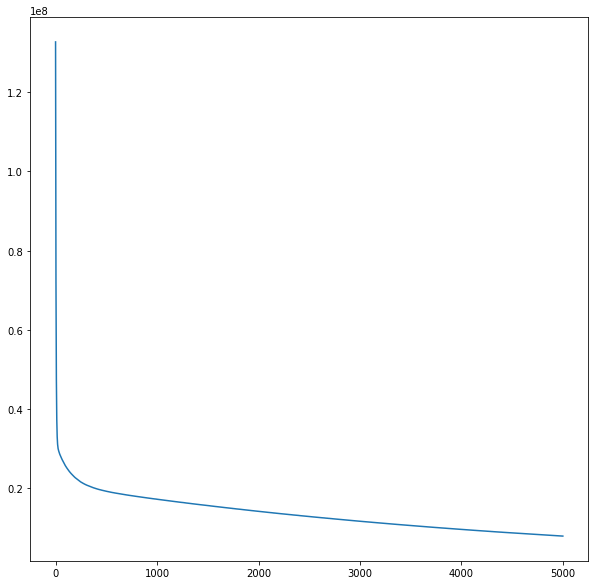

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])